In [4]:
import pandas as pd   
import numpy as np   
import urllib       
import re            #for processing regular expressions
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
import scipy         #for other dependancies
from sklearn.cluster import KMeans # for doing K-means clustering
import math          #for basic maths operations
import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
from IPython.display import HTML
from matplotlib.pyplot import *
from matplotlib import cm
from matplotlib import animation
import io
import base64

In [5]:
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from IPython.display import Image
from IPython.core.display import HTML 
import sklearn as sk
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.manifold as skm
import sklearn.preprocessing as skp

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from matplotlib import cm

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np

from haversine import haversine
from scipy.spatial.distance import euclidean , cityblock
from geopy.distance import great_circle
from math import *

from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

import folium 
from folium import plugins
from folium.plugins import HeatMap

In [44]:
train=pd.read_csv('data/NYC/train.csv')
train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124


In [45]:
test=pd.read_csv('data/NYC/test.csv')
test.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.99,40.73,-73.99,40.76,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.96,40.68,-73.96,40.66,N
2,id1217141,1,2016-06-30 23:59:47,1,-74.00,40.74,-73.99,40.73,N


In [9]:
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]
train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]
train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]
train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

In [10]:
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)
train['dropoff_month'] = train['dropoff_datetime'].dt.month

heat_df =train.sample(n=2500)

#Extract required columns
heat_df = heat_df[['dropoff_latitude', 'dropoff_longitude','dropoff_month']]


# Ensure you're handing it floats
heat_df['dropoff_latitude'] = heat_df['dropoff_latitude'].astype(float)
heat_df['dropoff_longitude'] = heat_df['dropoff_longitude'].astype(float)


#remove NANs
heat_df = heat_df.dropna(axis=0)


# Create weight column, using date
heat_df['Weight'] = heat_df['dropoff_month']
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['dropoff_latitude','dropoff_longitude', 'Weight'])

In [11]:
newyork_on_heatmap = folium.Map(location=[40.767937,-73.982155 ],tiles= "Stamen Terrain",
                    zoom_start = 13) 

# List comprehension to make out list of lists
heat_data = [[[row['dropoff_latitude'],row['dropoff_longitude']] 
                for index, row in heat_df[heat_df['Weight'] == i].iterrows()] 
                 for i in range(0,6)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(newyork_on_heatmap)

# Display the map
newyork_on_heatmap

This heatmap shows the drop off co-ordiantes monthwise from january to June.

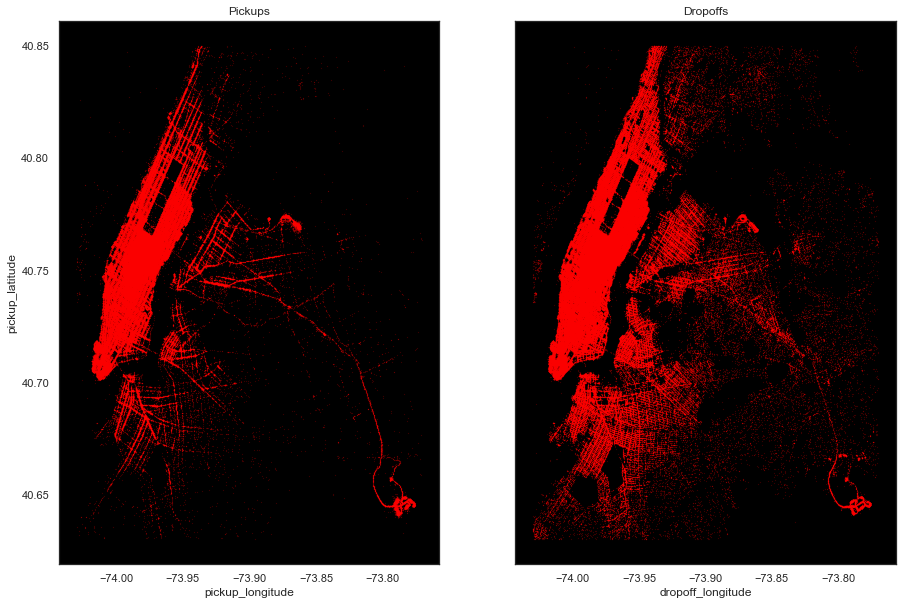

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='red', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='red', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 

Most of the trips have been from Manhattan.
Dropoffs are scattered all over New York city.
Most of the pickups are from Manhattan and mainly north of central park probably to the workplaces
John F. Kennedy International Airport and LaGuardia Airport are busy with both to and from trips.

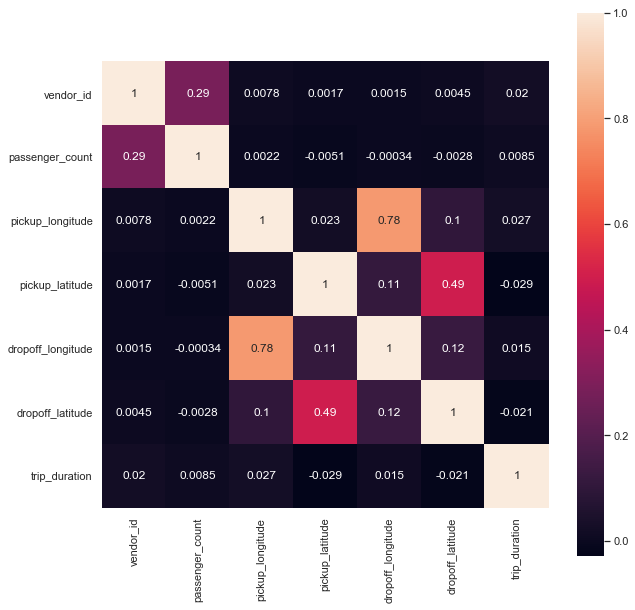

In [46]:
numtrain=train.select_dtypes(include=[np.number])
numtrain.corr()
plt.figure(figsize=(10,10))
sns.heatmap(numtrain.corr(),vmax=1,square=True,annot=True)

The highest correlation coefficient is between pickup_longitude and dropoff_longitude. This is higher than that of between pickup_langitude and dropoff_latitude, 0.49 because Manhattan is elongated in the North-South direction. This means that there is more variation in the latitude range and less variation of the longitude.

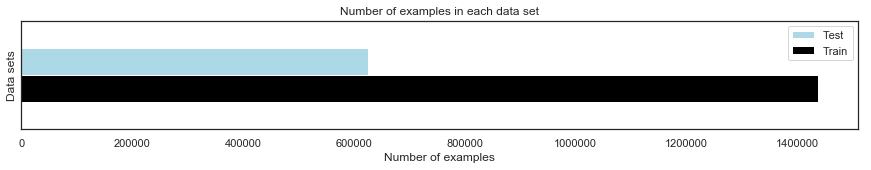

In [14]:
pd.DataFrame({'Train': [train.shape[0]], 'Test': [test.shape[0]]}).plot.barh(
    figsize=(15, 2), legend='reverse',  color=["black","lightblue"])
plt.title("Number of examples in each data set")
plt.ylabel("Data sets")
plt.yticks([])
plt.xlabel("Number of examples");

In [15]:
print("Training headcount is %i." % train.shape[0])
print("Testing headcount is %i." % test.shape[0])

Training headcount is 1438626.
Testing headcount is 625134.


In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dropoff_month
count,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00,1438626.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,945.99,3.52
std,0.50,1.31,0.04,0.03,0.03,0.03,5252.16,1.68
min,1.00,0.00,-74.03,40.63,-74.03,40.63,1.00,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,394.00,2.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,656.00,4.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1059.00,5.00
max,2.00,6.00,-73.77,40.85,-73.77,40.85,3526282.00,7.00


In [17]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.00,625134.00,625134.00,625134.00,625134.00,625134.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75
std,0.50,1.31,0.07,0.03,0.07,0.04
min,1.00,0.00,-121.93,37.39,-121.93,36.60
25%,1.00,1.00,-73.99,40.74,-73.99,40.74
50%,2.00,1.00,-73.98,40.75,-73.98,40.75
75%,2.00,2.00,-73.97,40.77,-73.96,40.77
max,2.00,9.00,-69.25,42.81,-67.50,48.86


Duration 

Since the evaluation metrics is RMSLE(Root Mean Squared Logarithmic Error), we can log transform trip duration and use RMSE(Root Mean Squared Error) for training. So that outliers won't affect model performance much. 

In [18]:
train['log_trip_duration'] = np.log1p(train['trip_duration'].values)

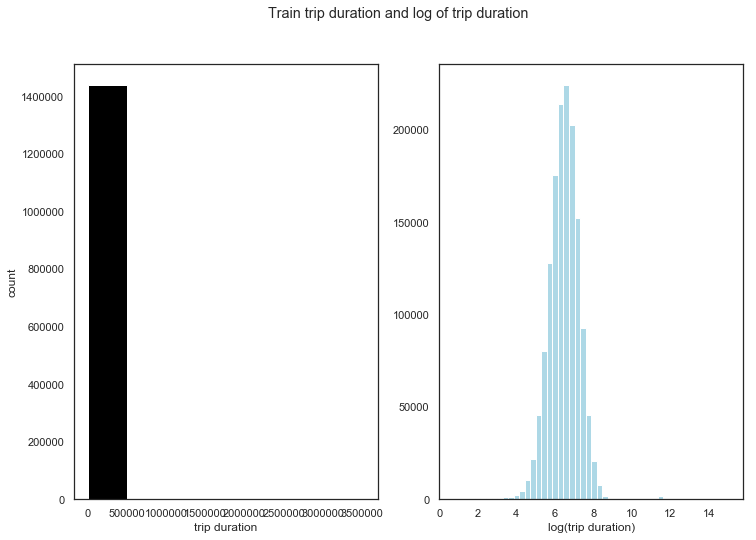

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,8))
fig.suptitle('Train trip duration and log of trip duration')
ax1.set_ylabel('count')
ax1.set_xlabel('trip duration')
ax2.set_xlabel('log(trip duration)')
ax1.hist(train.trip_duration,color='black',bins=7)
ax2.hist(train.log_trip_duration,bins=50,color='lightblue');

Vendor

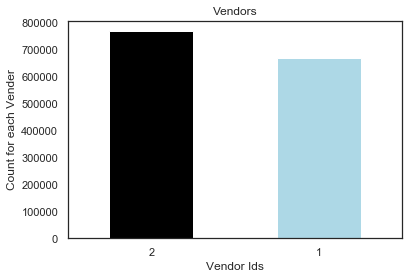

In [20]:
train["vendor_id"].value_counts().plot(kind='bar',color=["black","lightblue"])
plt.xticks(rotation='horizontal')
plt.title("Vendors")
plt.ylabel("Count for each Vender")
plt.xlabel("Vendor Ids");

Vendor 2 has more share in taxi rides

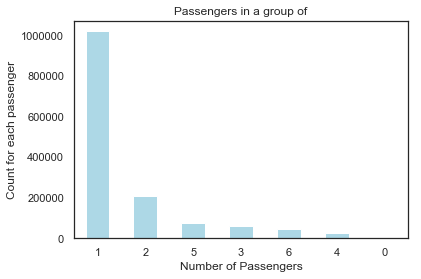

In [21]:
train["passenger_count"].value_counts().plot(kind='bar',color=["lightblue"])
plt.title("Passengers in a group of")
plt.xticks(rotation='horizontal')
plt.ylabel("Count for each passenger")
plt.xlabel("Number of Passengers");

1.Most popular choice of travel is single.
2.2nd popular way of ride is with a single friend.
3.May be for long cars popular choice of travel is in group of 5 and then in group of 6 people.
4.There are only 3 trips in group of 7 and single trip in group of 8 and 9 each.
5.There are 60 trips with zero passengers. Those must be outliers and have to be removed. Because no taxi ride can happen without passenger, at least paid one.

Whether the Trip Details are Stored Or Forwarded?

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

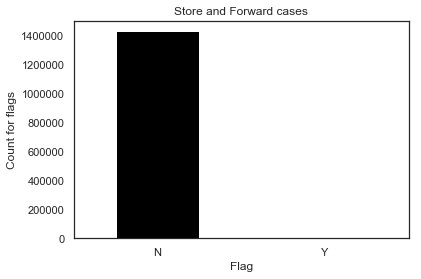

In [22]:
train["store_and_fwd_flag"].value_counts().plot(kind='bar',color=["black","gold"])
plt.title("Store and Forward cases")
plt.xticks(rotation='horizontal')
plt.ylabel("Count for flags")
plt.xlabel("Flag");

Almost all the journey details were immediately sent to vendors. 

Pickup hour rushes can define start of office timings and drop offs in evening can tell till what time New Yorkers work.
Weekdays and weekends can show another angle of city life. Weekends people will be getting up late and starting day late compared to weekdays. Also parties can go beyond midnight hours on weekends.
We can also look out for some kind of seasonality. For example, during winter seasons traffic will be going slow due to snowfalls or wetness on Roads. So, trip Duration will be longer in winters than other seasons.

In [23]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)


for df in (train,test):
    # Dates
    df['pickup_date'] = df['pickup_datetime'].dt.date

    # day of month 1 to 30/31
    df['pickup_day'] = df['pickup_datetime'].dt.day

    #month of year 1 to 12
    df['pickup_month'] = df['pickup_datetime'].dt.month

    #weekday 0 to 6
    df['pickup_weekday'] = df['pickup_datetime'].dt.weekday


    #week of year
    df['pickup_weekofyear'] = df['pickup_datetime'].dt.weekofyear

    #hour of day 0 to 23
    df['pickup_hour'] = df['pickup_datetime'].dt.hour

    #minute of hour
    df['pickup_minute'] = df['pickup_datetime'].dt.minute

    # day of year
    df['pickup_dayofyear'] = df['pickup_datetime'].dt.dayofyear

train['pickup_dt'] = (train['pickup_datetime'] - train['pickup_datetime'].min()).dt.total_seconds()
train['pickup_week_hour'] = train['pickup_weekday'] * 24 + train['pickup_hour']


test['pickup_dt'] = (test['pickup_datetime'] - train['pickup_datetime'].min()).dt.total_seconds()
test['pickup_week_hour'] = test['pickup_weekday'] * 24 + test['pickup_hour']

Seasonality: Taxi trips By Months

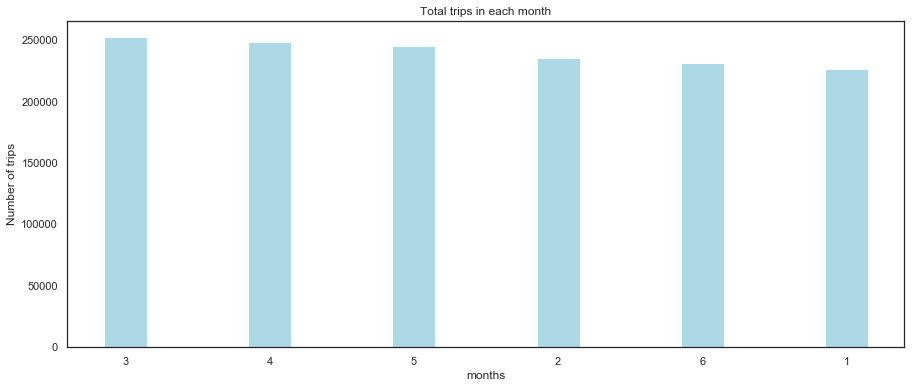

In [24]:
plt.figure(figsize=(15, 6)) 
train.pickup_month.value_counts().plot(kind='bar',color=["lightblue"],align='center',width=0.3)
plt.xticks(rotation='horizontal')
plt.xlabel("months")
plt.ylabel("Number of trips")
plt.title("Total trips in each month");

Highest number of trips happened in March and lowest in January. No big difference.

Taxi Trips By Pickup Day of the Month

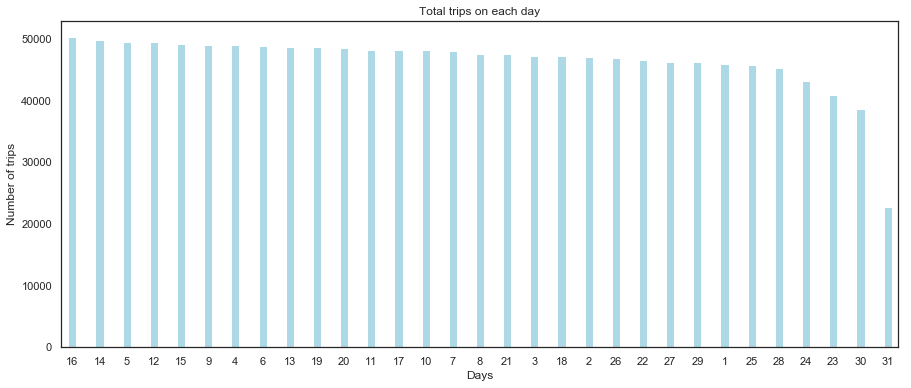

In [25]:
plt.figure(figsize=(15, 6)) 
train.pickup_day.value_counts().plot(kind='bar',color=["lightblue"],align='center',width=0.3)
plt.xlabel("Days")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of trips")
plt.title("Total trips on each day");

30th and 31st have less trips because we have 6 months data and 30th and 31st came only 3 times each.

Taxi Trips By Pickup WeekDays

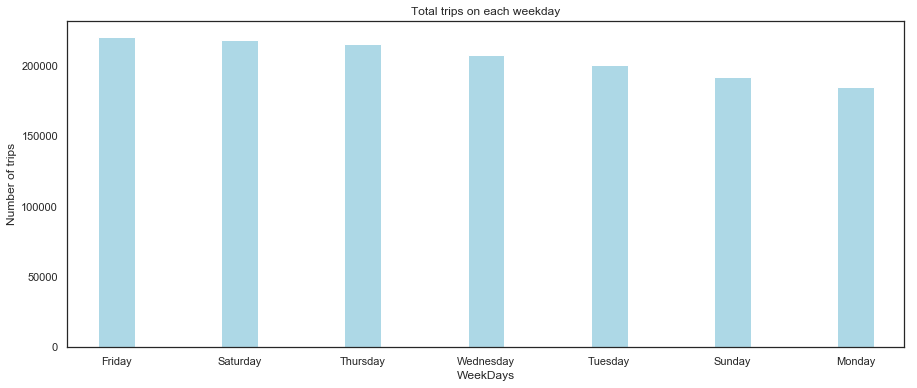

In [26]:
train['pickup_weekday_name'] = train['pickup_datetime'].dt.weekday_name
plt.figure(figsize=(15, 6)) 
train.pickup_weekday_name.value_counts().plot(kind='bar',color=["lightblue"],align='center',width=0.3)
plt.xlabel("WeekDays")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of trips")
plt.title("Total trips on each weekday");
train.drop('pickup_weekday_name',axis=1,inplace=True)

Highest number of trips took place on every Friday of the week while lowest on Mondays. 

Taxi Trips By Pickup Hour

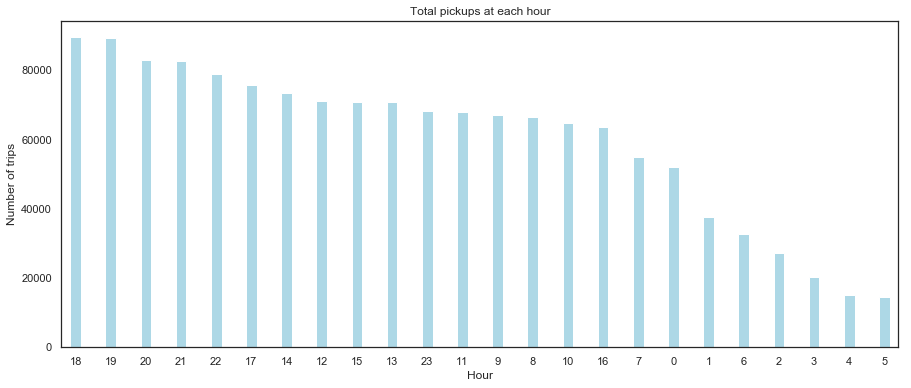

In [27]:
plt.figure(figsize=(15, 6)) 
train.pickup_hour.value_counts().plot(kind='bar',color=["lightblue"],align='center',width=0.3)
plt.xlabel("Hour")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of trips")
plt.title("Total pickups at each hour");

Most pickups were at 6 O'Clock in the evening may be due to people are leaving from work and least at 5 O'Clock early morning. Demand for pick ups starts from 6 in the early morning and it keeps growing as day passes.

Taxi trips by pickup hour and trip duration

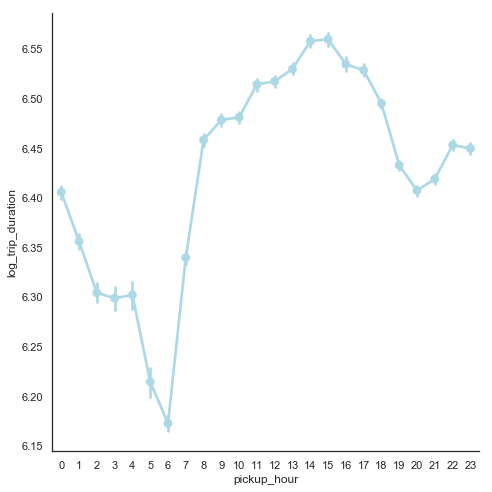

In [28]:
sns.factorplot(x="pickup_hour", y="log_trip_duration", data=train,color='lightblue',size=7);

Lowest trip durations were in early mornings past midnight. 
Traffic starts increasing once its 8AM people starting to offices and reaches it's peak around 3 O'Clock in noon.
And then starts decreasing slowly and again peaks after 8 till late nigh 11 O'Clock. May be because people going home after work hours.

Taxi Trips By Dropoff Hour

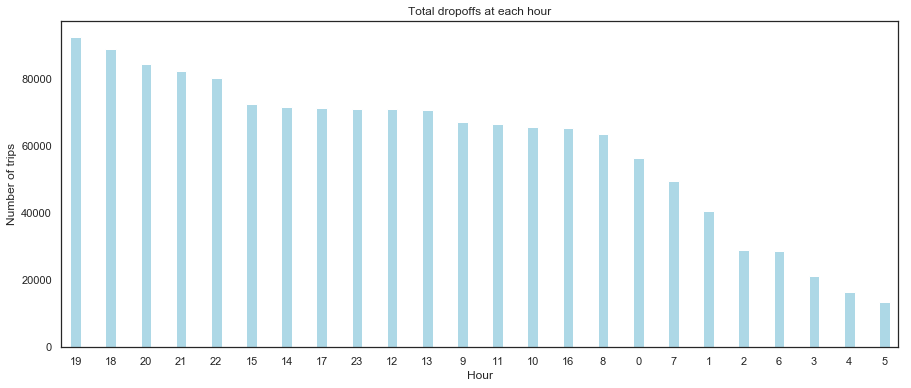

In [29]:
train['dropoff_hour'] = train['dropoff_datetime'].dt.hour
plt.figure(figsize=(15, 6)) 
train.dropoff_hour.value_counts().plot(kind='bar',color=["lightblue"],align='center',width=0.3)
plt.xticks(rotation='horizontal')
plt.xlabel("Hour")
plt.ylabel("Number of trips")
plt.title("Total dropoffs at each hour");
train.drop('dropoff_hour',axis=1,inplace=True)

Taxi trips by pickup minute Vs. Trip Duration

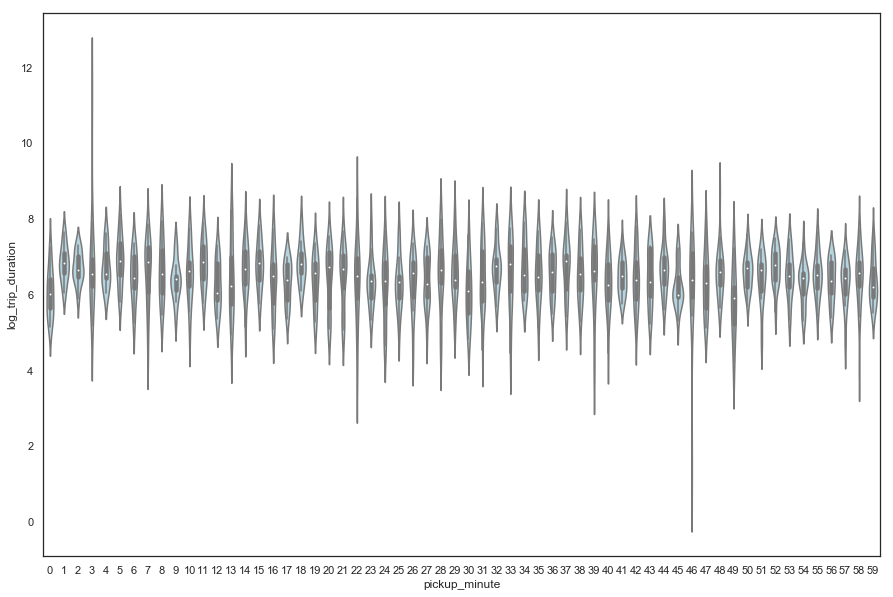

In [30]:
fig=plt.figure(figsize=(15,10))
sns.violinplot(x="pickup_minute", y="log_trip_duration", data=train[:1000],color='lightblue');

There are large spikes at minute 4 and 47. Pickup minute is also very important since we have to calculate total duration in seconds. Linear relationship can be seen in these 2 as well.

Calculate Distance

In [31]:
train['lat_diff'] = train['pickup_latitude'] - train['dropoff_latitude']
test['lat_diff'] = test['pickup_latitude'] - test['dropoff_latitude']

train['lon_diff'] = train['pickup_longitude'] - train['dropoff_longitude']
test['lon_diff'] = test['pickup_longitude'] - test['dropoff_longitude']

In [32]:
train['haversine_distance'] = train.apply(lambda row: haversine( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
test['haversine_distance'] = test.apply(lambda row: haversine( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
train['log_haversine_distance'] = np.log1p(train['haversine_distance']) 
test['log_haversine_distance'] = np.log1p(test['haversine_distance']) 

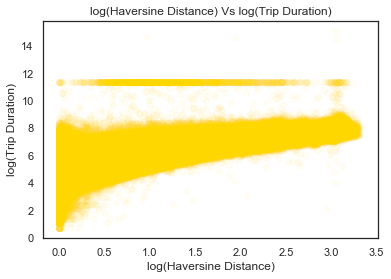

In [33]:
plt.scatter(train.log_haversine_distance,train.log_trip_duration,color="gold",alpha=0.04)
plt.ylabel("log(Trip Duration)")
plt.xlabel("log(Haversine Distance)")
plt.title("log(Haversine Distance) Vs log(Trip Duration)");

calculate manhattan distance 

In [34]:
def manhattan_distance(x,y):
  return sum(abs(a-b) for a,b in zip(x,y))

def euclidean_distance(x,y):
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

train['euclidean_distance'] = train.apply(lambda row: euclidean_distance( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
test['euclidean_distance'] = test.apply(lambda row: euclidean_distance( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
train['log_euclidean_distance'] = np.log1p(train['euclidean_distance']) 
test['log_euclidean_distance'] = np.log1p(test['euclidean_distance']) 

train['manhattan_distance'] = train.apply(lambda row: manhattan_distance( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
test['manhattan_distance'] = test.apply(lambda row: manhattan_distance( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
train['log_manhattan_distance'] = np.log1p(train['manhattan_distance']) 
test['log_manhattan_distance'] = np.log1p(test['manhattan_distance']) 

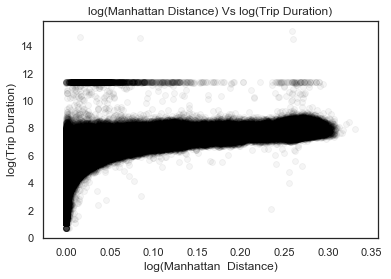

In [35]:
plt.scatter(train.log_manhattan_distance,train.log_trip_duration,color="black",alpha=0.04)
plt.ylabel("log(Trip Duration)")
plt.xlabel("log(Manhattan  Distance)")
plt.title("log(Manhattan Distance) Vs log(Trip Duration)");

Trip distance specifies lower bound for journey time